In [88]:
from glob import glob
import os

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib import cm
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from rasterio.plot import plotting_extent
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
import scipy.io
from scipy.io import loadmat
import pandas as pd
import h5py
import geopandas as gpd
# optional - turn off warnings
import warnings
warnings.filterwarnings('ignore')

from constants import *

os.chdir(home_dir)

In [160]:
all_watersheds=np.load('all_watersheds.npy')
sheds2=np.concatenate([all_watersheds[0:2], all_watersheds[3:]])
print(all_watersheds)
len(sheds2)

['american' 'carson' 'cosumnes' 'feather' 'kaweah' 'kern' 'kings' 'merced'
 'mokelumne' 'mono' 'owens' 'san_joaquin' 'stanislaus' 'tahoe' 'truckee'
 'tule' 'tuolumne' 'upper_sacramento' 'walker' 'yuba']


19

In [28]:
tmp = h5py.File('data/watershed_masks/american_watershed_mask.mat','r')
tmp.keys()

<KeysViewHDF5 ['american_mask', 'american_mask_lat', 'american_mask_lon', 'american_watershed_outline_coords']>

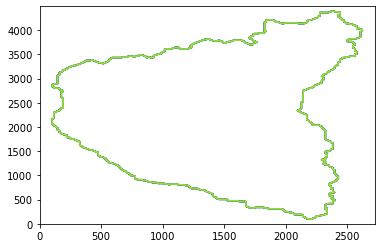

In [37]:
plt.contour(mask['american_mask'])
plt.show()
#print(mask['american_mask'])


In [143]:
all_watersheds

array(['american', 'carson', 'cosumnes', 'feather', 'kaweah', 'kern',
       'kings', 'merced', 'mokelumne', 'mono', 'owens', 'san_joaquin',
       'stanislaus', 'tahoe', 'truckee', 'tule', 'tuolumne',
       'upper_sacramento', 'walker', 'yuba'], dtype='<U16')

In [83]:
outline = mask[name+'_watershed_outline_coords']
xs =outline['x'][0]
ys = outline['y'][0]
'''
where = np.where(outline[:,:] == 1)
points= []
xs=[]
ys=[]
for i in range(len(where[0])):
    x= where[0][i]
    y= where[1][i]
    xs.append(x)
    ys.append(y)
    points.append([x,y])
'''

'\nwhere = np.where(outline[:,:] == 1)\npoints= []\nxs=[]\nys=[]\nfor i in range(len(where[0])):\n    x= where[0][i]\n    y= where[1][i]\n    xs.append(x)\n    ys.append(y)\n    points.append([x,y])\n'

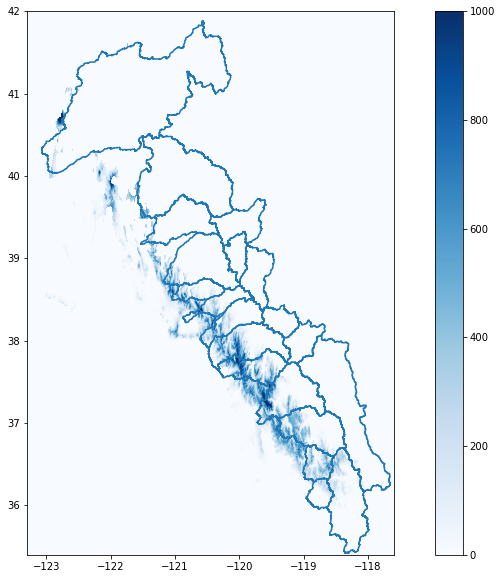

'df= pd.DataFrame({\'name\':[\'american\']})\n\ngeom = gpd.points_from_xy(xs,ys,crs="EPSG:4326")\ngdf = gpd.GeoDataFrame(\n    df, geometry=gpd.points_from_xy(xs,ys,crs="EPSG:4326"))\ngeom.plot()'

In [234]:
import h5py
yr=2013
watersheds=gpd.read_file('watersheds.gdf')
hf = h5py.File('/users/marianne/documents/pe_snow_fires/data/SN_SWE_WY'+ str(yr) + '.h5', 'r')
swe = hf.get('SWE')[180]
lon = hf.get('lon')
lat = hf.get('lat')
fig,ax=plt.subplots(figsize=(15,10))
im = ax.imshow(swe,cmap='Blues',vmin=0,vmax=1000,
                            extent=(np.nanmin(lon),
                            np.nanmax(lon),
                            np.nanmin(lat),
                            np.nanmax(lat)))

w2=watersheds.to_crs(swe.rio.crs)
w2.boundary.plot(ax=ax)
                            
'''for name in sheds2:
    tmp = h5py.File('data/watershed_masks/'+name+'_watershed_mask.mat','r')
    outline = tmp[name+'_watershed_outline_coords']
    xs =outline['x'][0]
    ys = outline['y'][0]
    ax.plot(xs,ys,'o',markersize=0.5)'''


fig.colorbar(im,ax=ax)
plt.show()

'''
testx=[]
testy=[]
for i in range(0,len(xs)):
    if (ys[i]>=ys[0]):
        testx.append(xs[i])
        testy.append(ys[i])


polygon_geom = Polygon(zip(testx, testy))
#print(polygon_geom)
tmp = polygon_geom.convex_hull
f,ax=plt.subplots()
#tmp.boundary.show(ax=ax)
#wkt = gpd.GeoSeries.from_xy(xs,ys,crs="EPSG:4326")
x,y = polygon_geom.exterior.xy
ax.plot(x,y)
plt.show()'''

'''df= pd.DataFrame({'name':['american']})

geom = gpd.points_from_xy(xs,ys,crs="EPSG:4326")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(xs,ys,crs="EPSG:4326"))
geom.plot()'''

In [278]:
watersheds=gpd.read_file('watersheds.gdf')
import rasterio
# create data
data = swe

# create coords
rows = lon[:].flatten()
cols = lat[:].flatten()

# put data into a dataset
ds = xr.Dataset(
    data_vars=dict(
        variable=(["y", "x"], data)
    ),
    coords=dict(
        lon=(["y"], rows),
        lat=(["x"], cols),
    ),
    attrs=dict(description="coords with vectors"),
)
ds.rio.to_raster('test.tif')
#test = ds.rio.write_crs(4326)

#test.rio.plot()
# CHeck the CRS
swe_ds=rasterio.open('test.tif')
#swe_ds.rio.crs

In [290]:
swe_ds= rxr.open_rasterio('test.tif')
#swe_ds.rio.write_crs(4326)
swe_ds.rio.write_crs("epsg:4326", inplace=True)
#swe_ds.rio.reproject(4326)
#swe_ds.write_crs(4326)

CRS.from_epsg(4326)

In [292]:
watersheds_rp = watersheds.to_crs(swe_ds.rio.crs)

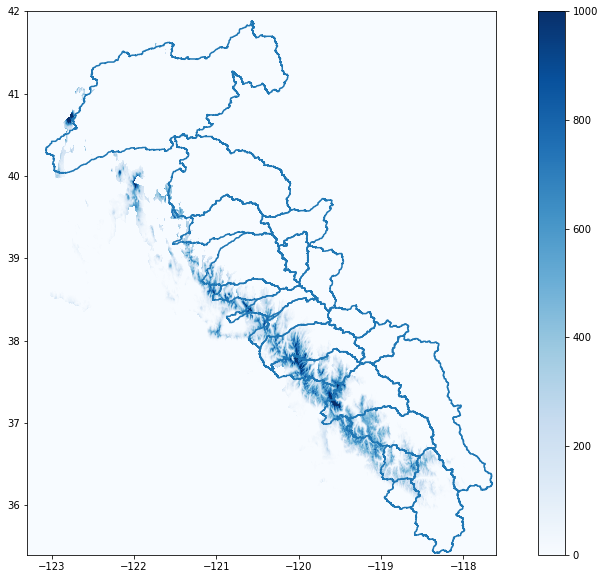

In [297]:
fig,ax=plt.subplots(figsize=(15,10))
im = ax.imshow(swe_ds[0,:,:],cmap='Blues',vmin=0,vmax=1000,
                            extent=(np.nanmin(lon),
                            np.nanmax(lon),
                            np.nanmin(lat),
                            np.nanmax(lat)))

watersheds.boundary.plot(ax=ax)
                        
fig.colorbar(im,ax=ax)
plt.show()

In [227]:
locs = [0,10,100,200]

pts = zip(xs[locs],ys[locs])
test = gpd.points_from_xy(xs[locs],ys[locs])
poly = Polygon(test)

start1=np.quantile(ys,.75)
start2=np.quantile(ys,.50)
start3=np.quantile(ys,.25)
#start4=np.quantile(ys,0)

start1=39.45
start2=39.1
start3=39.45
start4=39.1

testx=[]
splitx=121
locs1=[]
locs2=[]
locs3=[]
locs4=[]
testy=[]
for i in range(0,len(xs)):
    if(xs[i]>splitx):
        if (ys[i]>=start1):
            locs1.append(i)
        elif(ys[i]>=start2):
            locs2.append(i)
    else:        
        if(ys[i]>=start3):
            locs3.append(i)
        elif(ys[i]>=start4):
            locs4.append(i)

locs = locs1+locs2+locs3+locs4
pts = zip(xs[locs],ys[locs])
test = gpd.points_from_xy(xs[locs],ys[locs])
poly = Polygon(test)
poly.boundary



#fig,ax=plt.subplots()
#ax.plot(testx,testy)
#plt.show()
        

QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 13412)

While executing:  | qhull i Qx Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 2014327151  incidence  Qxact-merge  Qtriangulate  _zero-centrum
  Q3-no-merge-vertices-dim-high  _maxoutside  0


In [228]:
import scipy
scipy.spatial.ConvexHull([xs,ys])

QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 13412)

While executing:  | qhull i Qx Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 2014427993  incidence  Qxact-merge  Qtriangulate  _zero-centrum
  Q3-no-merge-vertices-dim-high  _maxoutside  0


<function ndarray.all>

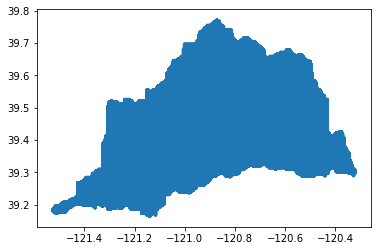

In [215]:
plt.plot(xs,ys)

In [115]:
mask = tmp
name = 'american'
#mask['american_mask']
#outline = mask[name+'_watershed_outline_coords']
outline = mask[name+'_mask']
lat = mask[name+'_mask_lat']
lon = mask[name+'_mask_lon']
plt.plot(lat,lon,outline)
plt.show()
#points = gpd.points_from_wkt(outline['x'][0],outline['y'][0],z=None)

TypeError: 'Polygon' object is not subscriptable

In [27]:
mask.keys()
lat
outline.keys()
#plt.show()
#points

<KeysViewHDF5 ['x', 'y']>

In [8]:
## convert masks to shapefiles perhaps
filepath = '/users/marianne/documents/data/watershed_masks/'
files = os.listdir(filepath)
tmp_list=[]
outlines_list=[]
for f in files:
    try:
        mask = h5py.File(filepath + f)
        name = f.split('_watershed')[0]
        outline = mask[name+'_watershed_outline_coords']
        points = gpd.points_from_xy(outline['x'][0],outline['y'][0],z=None)
        outlines_list.append([outline['x'][0],outline['y'][0]])
        poly = Polygon(points)
        # use the feature loop in case the polygon is a multipolygon
        features = [i for i in range(1)]
        tmp_list.append({'geometry': poly,'name':name})
    except:
        continue

#just for the cosumnes because the matlab file is a different version
mask = loadmat(filepath + 'cosumnes_watershed_mask.mat')
name = 'cosumnes'
outline = mask[name+'_watershed_outline_coords']
points = gpd.points_from_xy(outline['x'][0][0],outline['y'][0][0],z=None)
outlines_list.append([outline['x'][0][0],outline['y'][0][0]])
poly = Polygon(points)
features = [i for i in range(1)]
tmp_list.append({'geometry': poly,'name':name})

gdf = gpd.GeoDataFrame(tmp_list,crs=4326)
gdf.to_file('watersheds.gdf')


In [9]:
#mask = h5py.File(filepath + 'cosumnes_watershed_mask.mat')

mask = loadmat(filepath + 'cosumnes_watershed_mask.mat')
name = 'cosumnes'
outline = mask[name+'_watershed_outline_coords']
points = gpd.points_from_xy(outline['x'][0][0],outline['y'][0][0],z=None)
outlines_list.append([outline['x'][0][0],outline['y'][0][0]])
poly = Polygon(points)
features = [i for i in range(1)]
tmp_list.append({'geometry': poly,'name':name})


#scipy.io.savemat('cos_watershed_mask.mat',temp,appendmat=False, format='5')

## matlab save as v 7.3

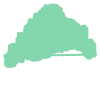

In [181]:
gdf=gpd.read_file('watersheds.gdf')
gdf
gdf['geometry'][10].boundary


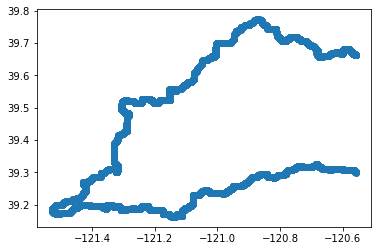

In [171]:
xs = outline['x'][0]
ys = outline['y'][0]
plt.plot(xs[0:10000],ys[0:10000],'o')

<AxesSubplot:>

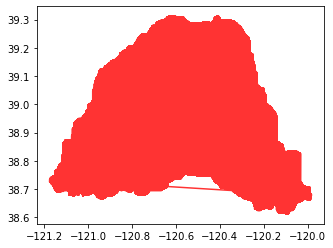

In [105]:
tmp = gpd.read_file('watershed_bounds/american.shp')
f,ax=plt.subplots()
tmp.boundary.plot(ax=ax,alpha=.8,color='red')

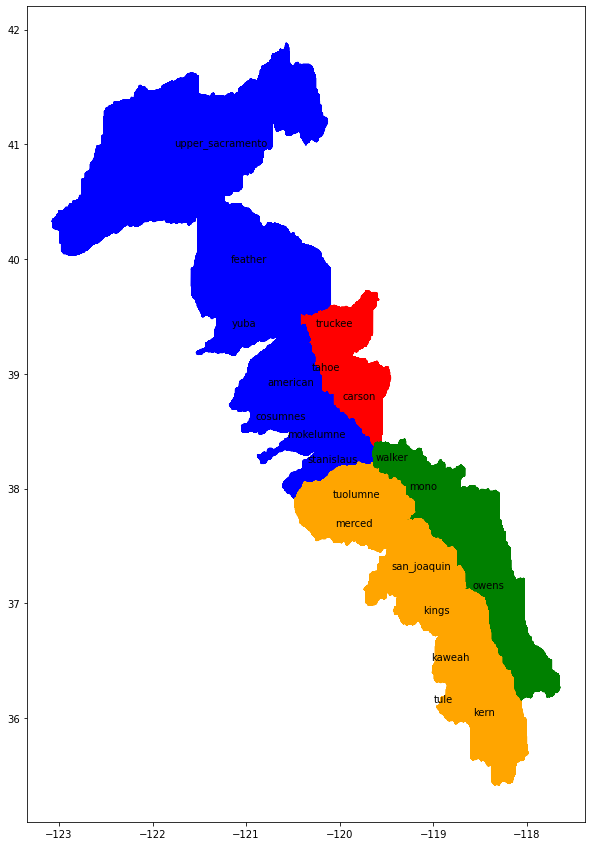

In [10]:
'''f,ax=plt.subplots(4,5,figsize=(20,25))
axs=ax.flatten()
for i in range(20):
    axs[i].plot(outlines_list[i][0],outlines_list[i][1])
    axs[i].set_title(gdf['name'][i])
'''

f,ax=plt.subplots(figsize=(10,15))
for i in range(20):
    name = gdf['name'][i]
    if(name in northwest):
        c = 'blue'
    elif(name in northeast):
        c = 'red'
    elif(name in southeast):
        c = 'green'
    else:
        c='orange'
    ax.plot(outlines_list[i][0],outlines_list[i][1],color=c)
    ax.text(np.nanmean(outlines_list[i][0]-0.25),np.nanmean(outlines_list[i][1]),name)
    #ax.set_title(gdf['name'][i])

[[array([-121.17541667, -121.17541667, -121.17541667, ..., -119.98347222,
         -119.98347222, -119.98347222]),
  array([38.73486111, 38.73458333, 38.73430556, ..., 38.67763889,
         38.67736111, 38.67708333])],
 [array([-119.99208333, -119.99208333, -119.99208333, ..., -119.45847222,
         -119.45847222, -119.45847222]),
  array([38.70986111, 38.70958333, 38.70930556, ..., 38.95680556,
         38.95652778, 38.95625   ])],
 [array([-121.58375   , -121.58375   , -121.58375   , ..., -120.09597222,
         -120.09597222, -120.09597222]),
  array([39.91402778, 39.91375   , 39.91347222, ..., 39.58375   ,
         39.58347222, 39.58319444])],
 [array([-119.00847222, -119.00847222, -119.00819444, ..., -118.52513889,
         -118.52513889, -118.52513889]),
  array([36.40180556, 36.40152778, 36.40208333, ..., 36.58180556,
         36.58152778, 36.58125   ])],
 [array([-118.64208333, -118.64208333, -118.64208333, ..., -117.98763889,
         -117.98763889, -117.98763889]),
  array([

In [11]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

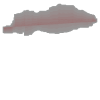

In [16]:
geo = Polygon(zip(outlines_list[i][0],outlines_list[i][1]))
df = gpd.GeoDataFrame(index=[0], geometry=[geo])
# coords = getFeatures(geo)


In [103]:
df.to_file(filename='polygon.shp', driver="ESRI Shapefile")
tmp = gpd.read_file('polygon.shp')
tmp.boundary.plot()

AttributeError: 'DataFrame' object has no attribute 'to_file'

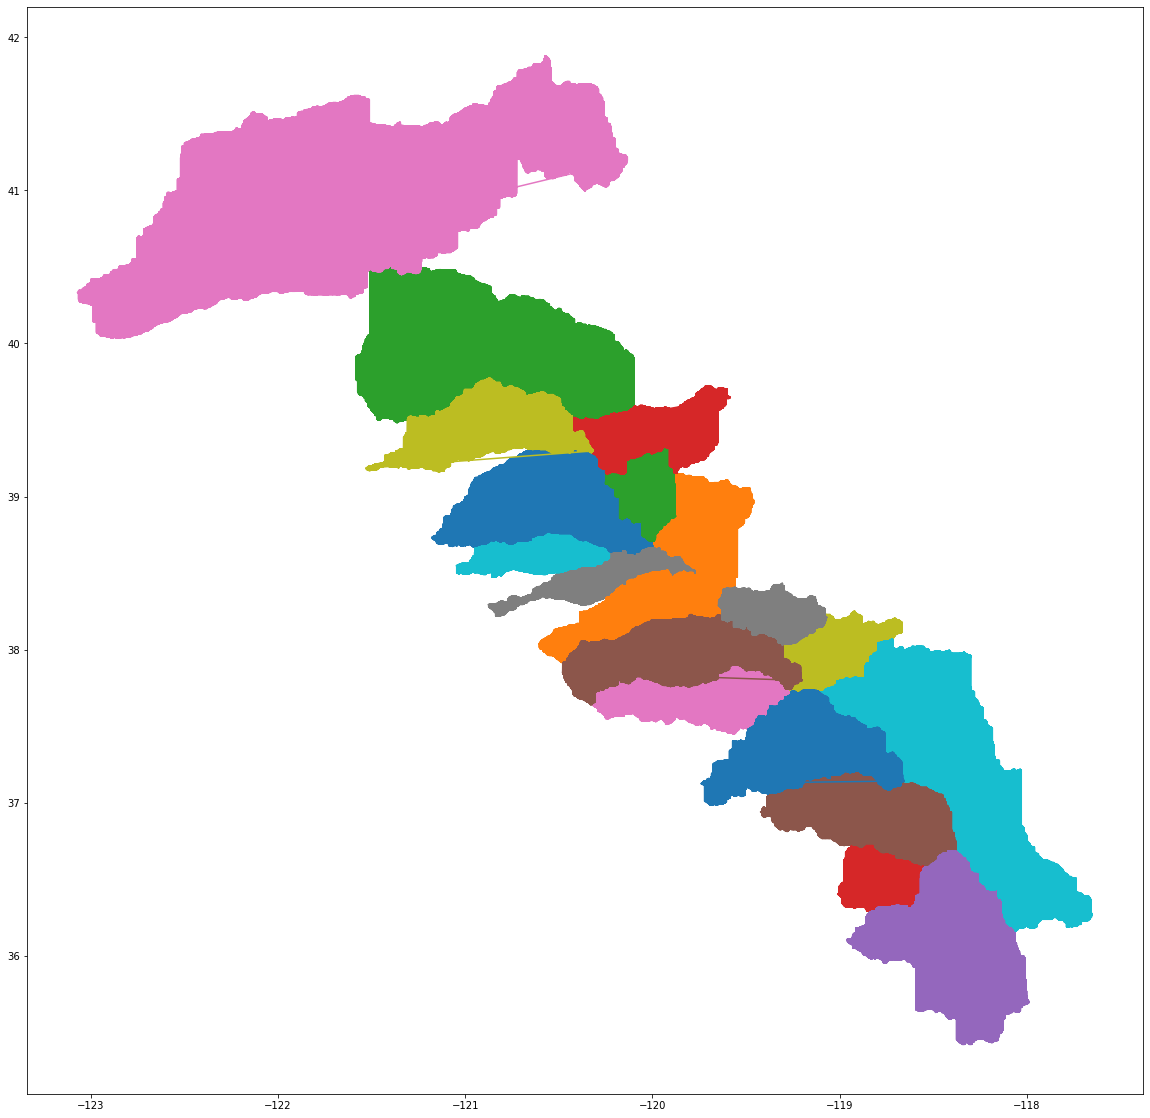

In [30]:
f,ax=plt.subplots(figsize=(20,20)) 
#watersheds.plot(ax=ax)
for i in range(len(gdf)):
    plt.plot(*gdf['geometry'][i].exterior.xy)


In [122]:
from geopandas import GeoDataFrame as gdf
import geopandas
import pandas as pd

df = pd.DataFrame(
    {'watershed': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

points= gdf(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))


AttributeError: 'Polygon' object has no attribute 'geometry'

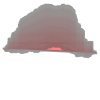

In [127]:
shptest = gpd.read_file('watershed_bounds/american.shp')
shptest['geometry'][0]

In [ ]:
pointInPolys = gpd.tools.sjoin(points, counties, op="within", how='left')


In [148]:
from osgeo import gdal, gdalnumeric, ogr
from PIL import Image, ImageDraw
import os
import numpy as np

def clip_raster(rast, features_path, gt=None, nodata=-9999):
    '''
    Clips a raster (given as either a gdal.Dataset or as a numpy.array
    instance) to a polygon layer provided by a Shapefile (or other vector
    layer). If a numpy.array is given, a "GeoTransform" must be provided
    (via dataset.GetGeoTransform() in GDAL). Returns an array. Clip features
    must be a dissolved, single-part geometry (not multi-part). Modified from:

    http://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html
    #clip-a-geotiff-with-shapefile

    Arguments:
        rast            A gdal.Dataset or a NumPy array
        features_path   The path to the clipping features
        gt              An optional GDAL GeoTransform to use instead
        nodata          The NoData value; defaults to -9999.
    '''
    def array_to_image(a):
        '''
        Converts a gdalnumeric array to a Python Imaging Library (PIL) Image.
        '''
        i = Image.fromstring('L',(a.shape[1], a.shape[0]),
            (a.astype('b')).tostring())
        return i

    def image_to_array(i):
        '''
        Converts a Python Imaging Library (PIL) array to a gdalnumeric image.
        '''
        a = gdalnumeric.fromstring(i.tobytes(), 'b')
        a.shape = i.im.size[1], i.im.size[0]
        return a

    def world_to_pixel(geo_matrix, x, y):
        '''
        Uses a gdal geomatrix (gdal.GetGeoTransform()) to calculate
        the pixel location of a geospatial coordinate; from:
        http://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html#clip-a-geotiff-with-shapefile
        '''
        ulX = geo_matrix[0]
        ulY = geo_matrix[3]
        xDist = geo_matrix[1]
        yDist = geo_matrix[5]
        rtnX = geo_matrix[2]
        rtnY = geo_matrix[4]
        pixel = int((x - ulX) / xDist)
        line = int((ulY - y) / xDist)
        return (pixel, line)

    # Can accept either a gdal.Dataset or numpy.array instance
    if not isinstance(rast, np.ndarray):
        gt = rast.GetGeoTransform()
        rast = rast.ReadAsArray()

    # Create an OGR layer from a boundary shapefile
    features = ogr.Open(features_path)
    if features.GetDriver().GetName() == 'ESRI Shapefile':
        lyr = features.GetLayer(os.path.split(os.path.splitext(features_path)[0])[1])

    else:
        lyr = features.GetLayer()

    # Get the first feature
    poly = lyr.GetNextFeature()

    # Convert the layer extent to image pixel coordinates
    minX, maxX, minY, maxY = lyr.GetExtent()
    ulX, ulY = world_to_pixel(gt, minX, maxY)
    lrX, lrY = world_to_pixel(gt, maxX, minY)

    # Calculate the pixel size of the new image
    pxWidth = int(lrX - ulX)
    pxHeight = int(lrY - ulY)

    # If the clipping features extend out-of-bounds and ABOVE the raster...
    if gt[3] < maxY:
        # In such a case... ulY ends up being negative--can't have that!
        iY = ulY
        ulY = 0

    # Multi-band image?
    # try:
    #     #clip = rast[:, ulY:lrY, ulX:lrX]

    # except IndexError:
    clip = rast[ulY:lrY, ulX:lrX]

    # Create a new geomatrix for the image
    gt2 = list(gt)
    gt2[0] = minX
    gt2[3] = maxY

    # Map points to pixels for drawing the boundary on a blank 8-bit,
    #   black and white, mask image.
    points = []
    pixels = []
    geom = poly.GetGeometryRef()
    pts = geom.GetGeometryRef(0)

    for p in range(pts.GetPointCount()):
        points.append((pts.GetX(p), pts.GetY(p)))

    for p in points:
        pixels.append(world_to_pixel(gt2, p[0], p[1]))

    raster_poly = Image.new('L', (pxWidth, pxHeight), 1)
    rasterize = ImageDraw.Draw(raster_poly)
    rasterize.polygon(pixels, 0) # Fill with zeroes

    # If the clipping features extend out-of-bounds and ABOVE the raster...
    if gt[3] < maxY:
        # The clip features were "pushed down" to match the bounds of the
        #   raster; this step "pulls" them back up
        premask = image_to_array(raster_poly)
        # We slice out the piece of our clip features that are "off the map"
        mask = np.ndarray((premask.shape[-2] - abs(iY), premask.shape[-1]), premask.dtype)
        mask[:] = premask[abs(iY):, :]
        mask.resize(premask.shape) # Then fill in from the bottom

        # Most importantly, push the clipped piece down
        gt2[3] = maxY - (maxY - gt[3])

    else:
        mask = image_to_array(raster_poly)

    # Clip the image using the mask
    try:
        clip = gdalnumeric.choose(mask, (clip, nodata))

    # If the clipping features extend out-of-bounds and BELOW the raster...
    except ValueError:
        # We have to cut the clipping features to the raster!
        rshp = list(mask.shape)
        if mask.shape[-2] != clip.shape[-2]:
            rshp[0] = clip.shape[-2]

        if mask.shape[-1] != clip.shape[-1]:
            rshp[1] = clip.shape[-1]

        mask.resize(*rshp, refcheck=False)

        clip = gdalnumeric.choose(mask, (clip, nodata))

    return (clip, ulX, ulY, gt2)


In [134]:
# find all modis files downloaded to modis_dir within individual directories and add them to a list with the full location
modis_dir = 'C:/Users/Marianne/e4ftl01.cr.usgs.gov/MOLT/MOD16A2.006/'
folders = os.listdir(modis_dir)
modis_files =[]
for d in folders:
    modis_files.append(modis_dir+d+'/'+os.listdir(modis_dir+d)[0])
#modis_files
modis = rxr.open_rasterio(modis_files[1],decode_times=False)
rast =modis['PET_500m']
rast=np.array(rast)
features = gpd.read_file('watershed_bounds/american.shp')

clip_raster(rast,features)

RuntimeError: not a string

In [149]:
rast = gdal.Open(modis_files[1],gdal.GA_ReadOnly)
clip_raster(rast,'watershed_bounds/american.shp')

TypeError: 'NoneType' object is not subscriptable

TypeError: 'Dataset' object is not subscriptable

In [142]:
rast

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001A9A5772990> >